# Solution to Final Exam
By 尚宇 21307130233
## 实现代码与解释
### 准备工作
+ 两种算法的实现

In [33]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

prediction_bisection = []
prediction_newton = []
# Bisection算法
def bisection(f, a, b, epsilon):
    prediction_bisection.clear()
    while (b - a) / 2 > epsilon:
        c = (a + b) / 2
        prediction_bisection.append(c)
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Newton算法
def newton(f, df, x0, epsilon):
    x = x0
    prediction_newton.clear()
    while abs(f(x)) > epsilon:
        prediction_newton.append(x)
        x = x - f(x) / df(x)
    return x

# 求根函数
def spicy(func, a, b):
    result = opt.root_scalar(func, bracket=[a, b], method='brentq')
    return result.root

+ 定义要求根的三个函数

In [34]:
#定义f1(x)
a1, b1 = -0.2, 1.4
epsilon1 = 1e-10
def f1(x):
    return 2 * x - np.tan(x)
def df1(x):
    return 2 - 1 / (np.cos(x) ** 2)

#定义f2(x)
a2, b2 = -2, 2
epsilon2 = 1e-10
def f2(x):
    return np.exp(x + 1) - 2 - x
def df2(x):
    return np.exp(x + 1) - 1

#定义f3(x)
a3, b3 = 0.5, 4 * np.pi
epsilon3 = 1e-10
def f3(x):
    return x ** (-2) - np.sin(x)
def df3(x):
    return -2 * x ** (-3) - np.cos(x)


### 求解过程
#### 画图以确定所求根的数量与所在区间

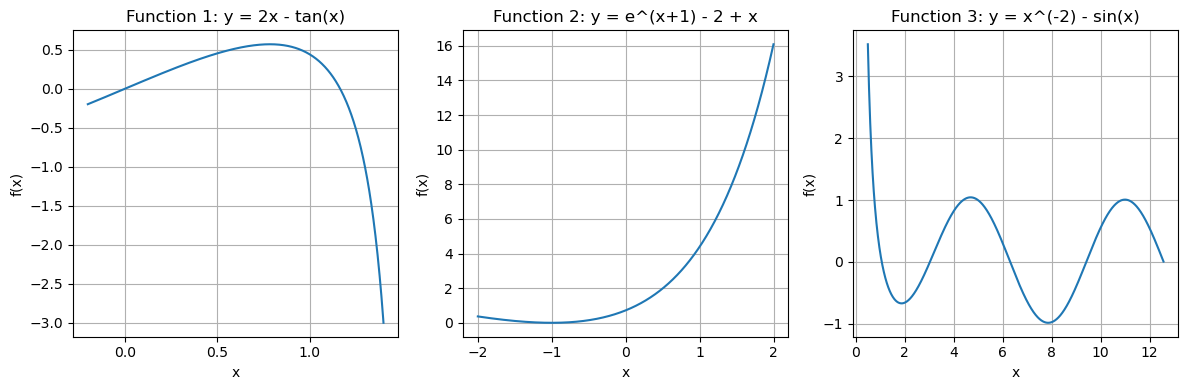

In [35]:
x_values = np.linspace(a1, b1, 1000)

# 绘制函数1的图像
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(x_values, f1(x_values), label='2x - tan(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function 1: y = 2x - tan(x)')
plt.grid()

# 绘制函数2的图像
x_values = np.linspace(a2, b2, 1000)
plt.subplot(132)
plt.plot(x_values, f2(x_values), label='e^(x+1) - 2 - x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function 2: y = e^(x+1) - 2 + x')
plt.grid()

# 绘制函数3的图像
x_values = np.linspace(a3, b3, 1000)
plt.subplot(133)
plt.plot(x_values, f3(x_values), label='x^(-2) - sin(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function 3: y = x^(-2) - sin(x)')
plt.grid()

plt.tight_layout()
plt.show()

#### 根据图像确定根的数量与区间

In [36]:
# 区间
intervals = []

# 函数1的根
roots1 = [(-0.2, 0.5),(1.0, 1.4)]
intervals.append(('Function 1', roots1))

# 函数2的根
roots2 = [(-2, 0)]
intervals.append(('Function 2', roots2))

# 函数3的根
roots3 = [(0.5, 2),(2, 4),(6, 8),(8, 10)]
intervals.append(('Function 3', roots3))


# 打印和存储区间信息
for func, roots in intervals:
    print(f'{func} has {len(roots)} root(s) in the following interval(s):')
    for i, (a, b) in enumerate(roots):
        print(f'Root {i + 1}: [{a}, {b}]')

Function 1 has 2 root(s) in the following interval(s):
Root 1: [-0.2, 0.5]
Root 2: [1.0, 1.4]
Function 2 has 1 root(s) in the following interval(s):
Root 1: [-2, 0]
Function 3 has 4 root(s) in the following interval(s):
Root 1: [0.5, 2]
Root 2: [2, 4]
Root 3: [6, 8]
Root 4: [8, 10]


#### 用**Bisection**, **Newton**, **scipy.optimize.root_scalar**三种方法求解函数的根
+ 求f1(x)的根

In [37]:
#解方程f1(x) = 0

#Bisection
roots1_bisection = []
for interval in roots1:
    roots1_bisection.append(bisection(f1, interval[0], interval[1], epsilon1))
print(f'Bisection:\n    Function 1 roots found by : {roots1_bisection}')

#Newton
roots1_newton = []
for interval in roots1:
    roots1_newton.append(newton(f1, df1, (interval[0] + interval[1]) / 2, epsilon1))
print(f'Newton:\n    Function 1 roots found by : {roots1_newton}')

#Scipy  
roots1_scipy = []
for interval in roots1:
    roots1_scipy.append(spicy(f1, interval[0], interval[1]))
print(f'Scipy:\n    Function 1 roots found by : {roots1_scipy}')


Bisection:
    Function 1 roots found by : [5.8207652983302947e-11, 1.1655611851252616]
Newton:
    Function 1 roots found by : [0.0, 1.1655611852072116]
Scipy:
    Function 1 roots found by : [-6.208381588204088e-17, 1.1655611852072105]


+ 求f2(x)的根

In [38]:
import sys
#解方程f2(x) = 0

#Bisection
roots2_bisection = []
for interval in roots2:
    roots2_bisection.append(bisection(f2, interval[0], interval[1], epsilon2))
print(f'Bisection:\n    Function 2 roots found by : {roots2_bisection}')

#Newton
roots2_newton = []
for interval in roots2:
    roots2_newton.append(newton(f2, df2, (interval[0] + interval[1]) / 2, epsilon2))
print(f'Newton:\n    Function 2 roots found by : {roots2_newton}')

#Scipy
roots2_scipy = []
for interval in roots2:
    try:
        roots2_scipy.append(spicy(f2, interval[0], interval[1]))
    except ValueError as e:
        roots2_scipy.append('Root not found' + f'Error: {e}')
print(f'Scipy:\n    Function 2 roots found by : {roots2_scipy}')


Bisection:
    Function 2 roots found by : [-1.0]
Newton:
    Function 2 roots found by : [-1.0]
Scipy:
    Function 2 roots found by : ['Root not foundError: f(a) and f(b) must have different signs']


+ 求f3(x)的根

In [39]:
#解方程f3(x) = 0

#Bisection
roots3_bisection = []
for interval in roots3:
    roots3_bisection.append(bisection(f3, interval[0], interval[1], epsilon3))
print(f'Bisection:\n    Function 3 roots found by : {roots3_bisection}')

#Newton
roots3_newton = []
for interval in roots3:
    roots3_newton.append(newton(f3, df3, (interval[0] + interval[1]) / 2, epsilon3))
print(f'Newton:\n    Function 3 roots found by : {roots3_newton}')

#Scipy
roots3_scipy = []
for interval in roots3:
    roots3_scipy.append(spicy(f3, interval[0], interval[1]))
print(f'Scipy:\n    Function 3 roots found by : {roots3_scipy}')



Bisection:
    Function 3 roots found by : [1.068223544250941, 3.032645418366883, 6.308316825248767, 9.413492803170811]
Newton:
    Function 3 roots found by : [1.068223544197249, 3.032645418388756, 6.3083168252685535, 9.413492803170124]
Scipy:
    Function 3 roots found by : [1.068223544197249, 3.032645418388756, 6.3083168252685535, 9.4134928031701]


### 比较2种方法的收敛速度

Error was set to 1e-10:
    Bisection iterated 33 times;
    Newton iterated 3 times;


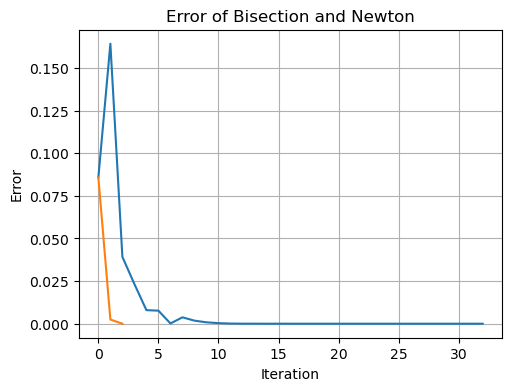

In [40]:
# 误差分析：x^2 - 2 = 0
a4, b4 = 1, 2
epsilon4 = 1e-10
def f4(x):
    return x ** 2 - 2

def df4(x):
    return 2 * x

#精确值
root4 = np.sqrt(2)

error_bisection = []
error_newton = []

#Bisection
root4_bisection = bisection(f4, a4, b4, epsilon4)
for i in range(len(prediction_bisection)):
    error_bisection.append(abs(prediction_bisection[i] - root4))

#Newton
root4_newton = newton(f4, df4, (a4 + b4) / 2, epsilon4)
for i in range(len(prediction_newton)):
    error_newton.append(abs(prediction_newton[i] - root4))

print(f'Error was set to {epsilon4}:')
print(f'    Bisection iterated {len(prediction_bisection)} times;')
print(f'    Newton iterated {len(prediction_newton)} times;')

#绘制误差图像
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(range(len(error_bisection)), error_bisection, label='Bisection')
plt.plot(range(len(error_newton)), error_newton, label='Newton')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error of Bisection and Newton')
plt.grid()
